# ANLP 2021 - Assignment 2

*Milena Voskanyan, 812148*

<div class="alert alert-block alert-danger">Due: Monday, December 13, 2021, 23:59pm</div>

<div class="alert alert-block alert-info">

**NOTE**
<br><br>

Please first fill in your name and id number at the top of the assignment, and **rename** the assignment file to **yourlastname-anlp-2.ipynb**<br><br>
Problems and questions are given in blue boxes like this one. All grey and white boxes must be filled by you (they either require code or a (brief!) discussion). <br><br>
Please hand in your assignment by the deadline via Moodle. In case of questions, you can contact the TAs or David via the usual channels.

</div>

<div class="alert alert-block alert-info">
    
In this assignment, you will implement a feedforward neural network and train it with backpropagation to classify intent from the provided dataset (<https://github.com/Dark-Sied/Intent_Classification>). For the purpose of understanding the learning process, the whole dataset is used as both training and test data. (What does that mean for your results?)<br><br>

You should implement all parts of this exercise using only python + standard libraries + NumPy. (That is, no specialised machine learning libraries are allowed.) Here is a list of NumPy functions that may or may not be useful for this task: <br>
`np.array(), np.eye(), np.reshape(), np.ones(), np.zeros(), np.dot(), np.concatenate(), np.maximum(), np.argmax(), np.sum(), np.uniform()`. <br><br>

A more comprehensive introduction to NumPy can be found here: <https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf> .

</div>

In [1]:
# For your convenience, a function for reading in the dataset:
import csv
import numpy.typing as npt
from typing import Tuple, List, Set, Dict

def load_dataset(filename: str) -> Tuple[List[str], List[str], Set[str]]:
    intent = []
    unique_intent = []
    sentences = []
    with open(filename, "r", encoding="latin1") as f:
        data = csv.reader(f, delimiter=",")
        for row in data:
            sentences.append(row[0])
            intent.append(row[1])
    unique_intent = set(intent)
    return sentences, intent, unique_intent

In [2]:
sentences, intent, unique_intent = load_dataset("dataset.csv")

## Problem 1: Bag-of-Words Representation [15pts]

<div class="alert alert-block alert-info">

The first thing you're being asked to do is to convert the text into a bag-of-words representation matrix where the dimension of the matrix is $V$ x $M$ ($M$: number of examples, $V$: vocabulary size) and the label to a matrix of dimension $K$ x $M$ where $K$ is number of classes.   

</div>

In [3]:
import numpy as np
import re
import string

tokens = []
vocab = []

# tokenizing sentences and creating list of lists
for i in sentences:
    split_word_from_pucnt = re.compile(r"[\w']+|[.,!?;]")
    tokens.append(split_word_from_pucnt.findall(i))
# flattening the list of lists
flat_list = [i for j in tokens for i in j]

# getting vocabulary
for words in flat_list:
    # lowercasing the words so that the same does not repeat in the vocab
    lowercased = words.lower()

    # appending to a new list only words
    if lowercased not in vocab and words not in string.punctuation:
        vocab.append(lowercased)
    else:
        continue
#  vocabulary size
V = len(vocab)
# number of examples/sentences
M = len(sentences)
# number of classes
K = len(unique_intent)

In [4]:
def bag_of_words_matrix(data: Tuple[List[str], List[str], Set[str]]) -> npt.ArrayLike:
    # setting matrix parameters
    bow_matrix = np.zeros((V, M))
    # enumerating tokens and vocabulary, looping through them to get the index of sentences and words
    for ind, sents in enumerate(tokens):
        for index, word in enumerate(vocab):
            # checking if word is in a sentence
            if word in sents:
                # if yes, replacing 0 with 1 
                bow_matrix[index][ind] = 1

    return bow_matrix

def labels_matrix(data: Tuple[List[str], List[str], Set[str]]) -> npt.ArrayLike:
    labels = np.zeros((K, M))
    for index, c in enumerate(unique_intent):
        for ind, cl in enumerate(intent):
            if c == cl:
                labels[index][ind] = 1
    
    return labels

## Problem 2: Activation Functions [10 pts]

<div class="alert alert-block alert-info">
    
For the classification task, the softmax activation function for the output layer with K classes is given by: 
$softmax(z_i) = \frac{e^{z_i}}{{\sum_{j=1}^{K}e^{z_j}}}$ <br>
The activation function of the hidden neurons is a non-linear function. We have seen tanh being used in class, but more common these days are for example ReLU or sigmoid, given by: <br>
$ReLU(z)=max(0,z)$ <br>
$sigmoid(z)=\frac{1}{1+e^{-z}}$ <br>

Implement the softmax, ReLU, and sigmoid activation function in such a way that it accepts NumPy array and matrices. Plot the ReLU and sigmoid functions, as well as their derivatives. Observe the plot and discuss briefly what the advantages and disadvantages of the ReLU and sigmoid activation function might be. 

</div>

In [5]:
# Implement the functions below here

def softmax(z: npt.ArrayLike) -> npt.ArrayLike:
    soft = np.exp(z) / np.sum(np.exp(z))
    return soft


def sigmoid(z: npt.ArrayLike) -> npt.ArrayLike:
    sigm = 1 / (1 + np.exp(-z)) 
    return sigm

def relu(z: npt.ArrayLike) -> npt.ArrayLike:
    reLU = np.maximum(0, z)
    return reLU

def sigmoid_prime(z: npt.ArrayLike) -> npt.ArrayLike:
    sig = sigmoid(z)
    sig_deriv = sig * (1 - sig)
    return sig_deriv

def relu_prime(z: npt.ArrayLike) -> npt.ArrayLike:
    relu_der = np.greater(z, 0).astype(int)
    return relu_der

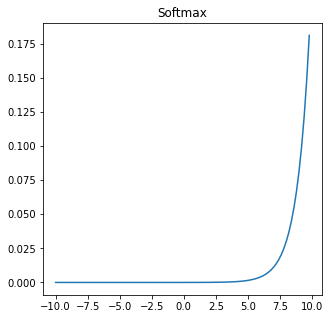

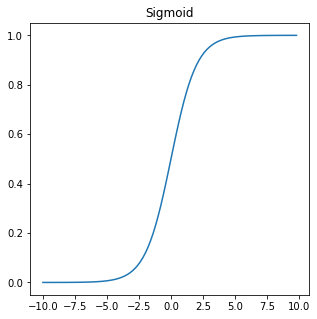

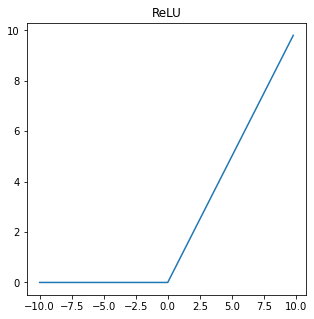

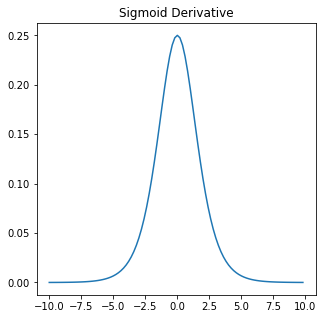

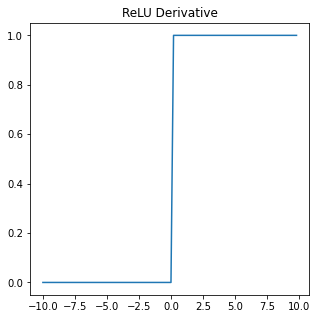

In [6]:
import matplotlib.pyplot as plt

x = np.arange(-10., 10., 0.2)

plt.rcParams["figure.figsize"] = (5, 5)

plt.plot(x, softmax(x))
plt.title('Softmax')
plt.show()

plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.show()

plt.plot(x, relu(x))
plt.title('ReLU')
plt.show()

plt.plot(x, sigmoid_prime(x))
plt.title('Sigmoid Derivative')
plt.show()

plt.plot(x, relu_prime(x))
plt.title('ReLU Derivative')
plt.show()

Sigmoid

Advantages:

- can be used to activate hidden layers in a neural network as it is nonlinear
- gradient-based backpropagation can be used with it because it is differentiable everywhere
- can generate probabilities since its output range is from 0 to 1 

Disadvantages:

- the problem of vanishing gradient may occur
- the sum of all classes doesn’t necessarily sum to 1 when being used as the final activation in a classifier


ReLU

Advantages:

- camputationally more efficient to compute
- allows backpropogation

Disadvantages:

- if too many activations are < 0, then most of the units will have zero as their output

## Problem 3: Feedforward Neural Network [35 pts]

<div class="alert alert-block alert-info">
    
Now that you have created the input matrix, we can implement our neural network and perform a forward propagation to classify intent. To perform the forward propagation, you should compute $z^{l}$ and pass it through the activation function for each layer, given by: <br><br>
$z^{l} = W^{l}a^{l-1} + b^{l}$ <br>
$a^{l} = g(z^{l})$ <br>
where $W^{l}$ is a weight matrix between layer $l$ and $l+1$, $z^{l}$ is value of the hidden layer at layer $l$ before activation, $a^{l}$ is value of the hidden layer at layer $l$ after activation, and $b^{l}$ is bias term for layer $l$.

You should implement the feedforward computation that computes $\hat{y_{i}}$ for every example $i$. The neural network has 3 layers - an input layer, a hidden layer and an output layer, where the hidden layer has 150 neurons. Don't forget to include the bias term. Use ReLU as the activation function for the hidden layer and softmax for the output layer. For parameters initialization, use random values from a uniform distribution in the range (-1,1). Provide a seed value to the random number generator, to make the results reproducible. The purpose of using this kind of initialisation is to break symmetry and ensure that different neurons can learn different non-linear functions. (Hint: use vectorization methods instead of a for loop for speedup.) <br><br>

Use this neural network to predict the intent and calculate the accuracy of the classifier. (Should you be expecting high numbers yet?)

</div>

In [7]:
# Define the functions specified below

def init_model(
    input_size: int,
    num_classes: int, 
    seed = 42,
    hidden_size = 150
) -> Dict[str, npt.ArrayLike]:
    
    # weight and bias matrix with random numbers
    np.random.seed(seed)
    
    model = {}
    model['W1'] = np.random.uniform(-1,1, (hidden_size, input_size))
    model['b1'] = np.random.uniform(-1,1, (hidden_size, 1))
    model['W2'] = np.random.uniform(-1,1, (num_classes, hidden_size))
    model['b2'] = np.random.uniform(-1,1, (num_classes, 1))
    return model

def forward(model: Dict[str, npt.ArrayLike], X: npt.ArrayLike) -> npt.ArrayLike:
    # feedforward calculations
    hidden_layer_inputs = np.dot(model['W1'], X) + model['b1']
    hidden_layer_outputs = relu(hidden_layer_inputs)
    output_layer_inputs = np.dot(model['W2'], hidden_layer_outputs) + model['b2']
    output_layer_outputs = softmax(output_layer_inputs)
    #print(len(output))
    return output_layer_outputs



def predict(model: Dict[str, npt.ArrayLike], X: npt.ArrayLike) -> npt.ArrayLike:
    # creating the prediction matrix
    predicted = np.zeros(((len(model['W2']), (len(sentences)))))
    for sentence in range(len(sentences)):
        y_hat = np.argmax(X[:,sentence])
        predicted[y_hat][sentence] = 1

    return predicted 

# Do not run any other code in this cell

In [8]:
onehot_labels = labels_matrix((tokens, intent, unique_intent))
bow_sent = bag_of_words_matrix(tokens)
model = init_model(input_size=len(bow_sent), num_classes=len(onehot_labels))
forward_func = forward(model, bow_sent)
final = predict(model, forward_func)

# ACCURACY
def accuracy(predicted, true):
    example_count = predicted.shape[1]
    correct_count = 0
    
    for j in range(predicted.shape[1]):
        if (np.where(predicted[:,j] == 1)) == (np.where(true[:,j] == 1)):
            correct_count = correct_count + 1
    return correct_count/example_count

In [9]:
print("Accuracy =", accuracy(final, onehot_labels))

Accuracy = 0.061096136567834684
